# 분류

## 4.8 분류 실습 - 캐글 산탄데르 고객 만족 예측
- 산탄데르 고객 만족 예측 분석은 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측하는 것
- 데이터 피처 이름은 모두 익명 처리되어 있고, Target은 1이면 불만을 가진 고객, 0이면 만족한 고객

#### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./data/santander/train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt))) # 불만인 고객의 비율(4%)

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe() # var3 칼럼 min 이상(nan 값을 -999999로 변환했을 것)하므로 가장 빈도가 많은 2로 변환해야 함

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt) # 학습, 테스트 데이터 모두 불만 고객의 비율이 비슷하게 분리됨

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


#### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행(eval_metric을 캐글 평가 기준인 'auc'로 설정)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) # 테스트 데이터를 평가 데이터로 사용 시 과적합의 문제가 있음을 인지하고 넘어갈 것

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [8]:
# 시간이 오래 걸리므로 생략(그리드 서치를 통한 GBM의 하이퍼 파라미터 선정)
"""
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\n# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소\nxgb_clf = XGBClassifier(n_estimators=100)\n\nparams = {\'max_depth\':[5, 7] , \'min_child_weight\':[1,3] ,\'colsample_bytree\':[0.5, 0.75]}\n\n# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. \ngridcv = GridSearchCV(xgb_clf, param_grid=params)\ngridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])\n\nprint(\'GridSearchCV 최적 파라미터:\',gridcv.best_params_) \n\nxgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average=\'macro\')\nprint(\'ROC AUC: {0:.4f}\'.format(xgb_roc_score))\n'

In [9]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.710266	validation_1-auc:0.718502
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.804679	validation_1-auc:0.805449
[2]	validation_0-auc:0.799198	validation_1-auc:0.794525
[3]	validation_0-auc:0.800034	validation_1-auc:0.795415
[4]	validation_0-auc:0.805393	validation_1-auc:0.798995
[5]	validation_0-auc:0.815966	validation_1-auc:0.811068
[6]	validation_0-auc:0.823302	validation_1-auc:0.818172
[7]	validation_0-auc:0.826098	validation_1-auc:0.821709
[8]	validation_0-auc:0.829149	validation_1-auc:0.824573
[9]	validation_0-auc:0.828324	validation_1-auc:0.823395
[10]	validation_0-auc:0.829604	validation_1-auc:0.824195
[11]	validation_0-auc:0.82942	validation_1-auc:0.82473
[12]	validation_0-auc:0.831163	validation_1-auc:0.825752
[13]	validation_0-auc:0.828768	validation_1-auc:0.824629
[14]	validation_0-auc:0.83088	validation_1-auc:0.826452


[141]	validation_0-auc:0.85591	validation_1-auc:0.840745
[142]	validation_0-auc:0.855947	validation_1-auc:0.840812
[143]	validation_0-auc:0.855967	validation_1-auc:0.840913
[144]	validation_0-auc:0.856058	validation_1-auc:0.841041
[145]	validation_0-auc:0.85607	validation_1-auc:0.841038
[146]	validation_0-auc:0.856296	validation_1-auc:0.84127
[147]	validation_0-auc:0.856432	validation_1-auc:0.841253
[148]	validation_0-auc:0.856492	validation_1-auc:0.841429
[149]	validation_0-auc:0.856607	validation_1-auc:0.841521
[150]	validation_0-auc:0.856802	validation_1-auc:0.84173
[151]	validation_0-auc:0.856985	validation_1-auc:0.841746
[152]	validation_0-auc:0.85716	validation_1-auc:0.841974
[153]	validation_0-auc:0.857348	validation_1-auc:0.841853
[154]	validation_0-auc:0.857526	validation_1-auc:0.841963
[155]	validation_0-auc:0.857742	validation_1-auc:0.842088
[156]	validation_0-auc:0.857848	validation_1-auc:0.842093
[157]	validation_0-auc:0.858013	validation_1-auc:0.842326
[158]	validation_0-

[283]	validation_0-auc:0.872809	validation_1-auc:0.843318
[284]	validation_0-auc:0.872936	validation_1-auc:0.843289
[285]	validation_0-auc:0.873078	validation_1-auc:0.843356
[286]	validation_0-auc:0.873143	validation_1-auc:0.843355
[287]	validation_0-auc:0.873217	validation_1-auc:0.843405
[288]	validation_0-auc:0.873295	validation_1-auc:0.84332
[289]	validation_0-auc:0.873436	validation_1-auc:0.843355
[290]	validation_0-auc:0.873543	validation_1-auc:0.843438
[291]	validation_0-auc:0.87359	validation_1-auc:0.843398
[292]	validation_0-auc:0.873658	validation_1-auc:0.843392
[293]	validation_0-auc:0.873743	validation_1-auc:0.843353
[294]	validation_0-auc:0.873808	validation_1-auc:0.843294
[295]	validation_0-auc:0.873893	validation_1-auc:0.843304
[296]	validation_0-auc:0.873974	validation_1-auc:0.843305
[297]	validation_0-auc:0.874077	validation_1-auc:0.843244
[298]	validation_0-auc:0.874203	validation_1-auc:0.843296
[299]	validation_0-auc:0.874278	validation_1-auc:0.843299
[300]	validation

ROC AUC: 0.8441


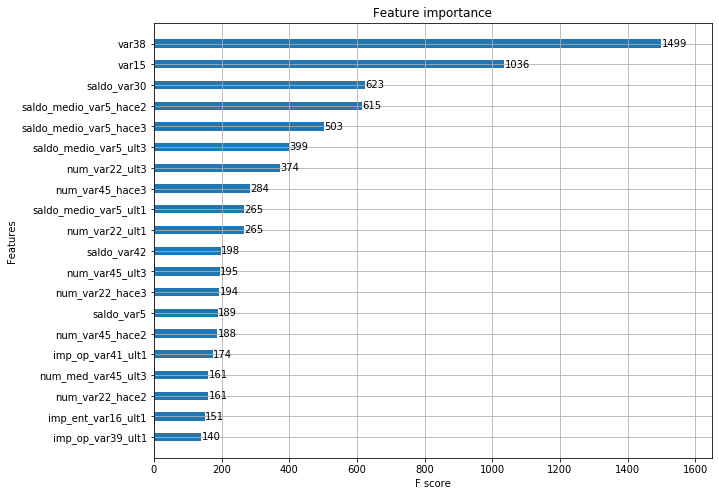

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4) # var38과 var15가 매우 중요한 변수로 나타남

#### LightGBM 모델 학습과 하이퍼 파라미터 튜닝
- 앞 선 XGBoost 예제와 동일하게 n_estimator를 설정하고 진행

In [11]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


In [12]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82965	valid_0's binary_logloss: 0.15092	valid_1's auc: 0.824865	valid_1's binary_logloss: 0.15978
[3]	valid_0's auc: 0.835112	valid_0's binary_logloss: 0.147151	valid_1's auc: 0.826157	valid_1's binary_logloss: 0.156174
[4]	valid_0's auc: 0.839678	valid_0's binary_logloss: 0.14422	valid_1's auc: 0.830489	valid_1's binary_logloss: 0.153395
[5]	valid_0's auc: 0.842477	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.832915	valid_1's binary_logloss: 0.151083
[6]	valid_0's auc: 0.845763	valid_0's binary_logloss: 0.139668	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149317
[7]	valid_0's auc: 0.846352	valid_0's binary_logloss: 0.137997	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.14773
[8]	valid_0's auc: 0.849153	valid_0's binary_logloss: 0.13653	valid_1's auc: 0.837152	valid

[27]	valid_0's auc: 0.873237	valid_0's binary_logloss: 0.124997	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874176	valid_0's binary_logloss: 0.124703	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.13975
[29]	valid_0's auc: 0.875669	valid_0's binary_logloss: 0.12433	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139647
[30]	valid_0's auc: 0.876717	valid_0's binary_logloss: 0.12398	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139626
[31]	valid_0's auc: 0.877795	valid_0's binary_logloss: 0.123676	valid_1's auc: 0.838812	valid_1's binary_logloss: 0.139567
[32]	valid_0's auc: 0.878434	valid_0's binary_logloss: 0.12342	valid_1's auc: 0.838766	valid_1's binary_logloss: 0.139551
[33]	valid_0's auc: 0.879133	valid_0's binary_logloss: 0.123178	valid_1's auc: 0.838496	valid_1's binary_logloss: 0.139549
[34]	valid_0's auc: 0.880045	valid_0's binary_logloss: 0.122943	valid_1's auc: 0.838858	valid_1's binary_logloss: 0.13947
[35]	valid_0's auc: 0

[29]	valid_0's auc: 0.876023	valid_0's binary_logloss: 0.123799	valid_1's auc: 0.838707	valid_1's binary_logloss: 0.139253
[30]	valid_0's auc: 0.876849	valid_0's binary_logloss: 0.123528	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.139194
[31]	valid_0's auc: 0.877276	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.839117	valid_1's binary_logloss: 0.139112
[32]	valid_0's auc: 0.878261	valid_0's binary_logloss: 0.122955	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139114
[33]	valid_0's auc: 0.878852	valid_0's binary_logloss: 0.12268	valid_1's auc: 0.83874	valid_1's binary_logloss: 0.139099
[34]	valid_0's auc: 0.880003	valid_0's binary_logloss: 0.122395	valid_1's auc: 0.838575	valid_1's binary_logloss: 0.139116
[35]	valid_0's auc: 0.880983	valid_0's binary_logloss: 0.12215	valid_1's auc: 0.838595	valid_1's binary_logloss: 0.139087
[36]	valid_0's auc: 0.881662	valid_0's binary_logloss: 0.121903	valid_1's auc: 0.838391	valid_1's binary_logloss: 0.139114
[37]	valid_0's auc:

[13]	valid_0's auc: 0.858931	valid_0's binary_logloss: 0.131258	valid_1's auc: 0.837569	valid_1's binary_logloss: 0.143004
[14]	valid_0's auc: 0.8606	valid_0's binary_logloss: 0.130532	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.14251
[15]	valid_0's auc: 0.862474	valid_0's binary_logloss: 0.129788	valid_1's auc: 0.838158	valid_1's binary_logloss: 0.142078
[16]	valid_0's auc: 0.864271	valid_0's binary_logloss: 0.129131	valid_1's auc: 0.838075	valid_1's binary_logloss: 0.141796
[17]	valid_0's auc: 0.865398	valid_0's binary_logloss: 0.128509	valid_1's auc: 0.837949	valid_1's binary_logloss: 0.141482
[18]	valid_0's auc: 0.866784	valid_0's binary_logloss: 0.127959	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.141186
[19]	valid_0's auc: 0.867792	valid_0's binary_logloss: 0.127422	valid_1's auc: 0.838186	valid_1's binary_logloss: 0.141055
[20]	valid_0's auc: 0.869084	valid_0's binary_logloss: 0.126953	valid_1's auc: 0.839326	valid_1's binary_logloss: 0.140789
[21]	valid_0's auc:

[29]	valid_0's auc: 0.876828	valid_0's binary_logloss: 0.12384	valid_1's auc: 0.83773	valid_1's binary_logloss: 0.139822
[30]	valid_0's auc: 0.877457	valid_0's binary_logloss: 0.123547	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.139791
[31]	valid_0's auc: 0.879129	valid_0's binary_logloss: 0.123153	valid_1's auc: 0.837573	valid_1's binary_logloss: 0.139724
[32]	valid_0's auc: 0.88021	valid_0's binary_logloss: 0.122849	valid_1's auc: 0.837413	valid_1's binary_logloss: 0.13971
[33]	valid_0's auc: 0.880849	valid_0's binary_logloss: 0.1226	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139722
[34]	valid_0's auc: 0.881626	valid_0's binary_logloss: 0.122303	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.139833
[35]	valid_0's auc: 0.88223	valid_0's binary_logloss: 0.122074	valid_1's auc: 0.836267	valid_1's binary_logloss: 0.139875
[36]	valid_0's auc: 0.883053	valid_0's binary_logloss: 0.121807	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.139815
[37]	valid_0's auc: 0.8

[58]	valid_0's auc: 0.895326	valid_0's binary_logloss: 0.117469	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.13955
[59]	valid_0's auc: 0.895879	valid_0's binary_logloss: 0.117248	valid_1's auc: 0.839213	valid_1's binary_logloss: 0.139528
[60]	valid_0's auc: 0.896271	valid_0's binary_logloss: 0.117049	valid_1's auc: 0.839353	valid_1's binary_logloss: 0.13952
[61]	valid_0's auc: 0.896615	valid_0's binary_logloss: 0.116883	valid_1's auc: 0.839499	valid_1's binary_logloss: 0.139489
[62]	valid_0's auc: 0.896835	valid_0's binary_logloss: 0.116752	valid_1's auc: 0.83954	valid_1's binary_logloss: 0.139477
[63]	valid_0's auc: 0.897122	valid_0's binary_logloss: 0.116584	valid_1's auc: 0.839488	valid_1's binary_logloss: 0.139542
[64]	valid_0's auc: 0.897561	valid_0's binary_logloss: 0.116399	valid_1's auc: 0.839571	valid_1's binary_logloss: 0.139557
[65]	valid_0's auc: 0.89769	valid_0's binary_logloss: 0.116288	valid_1's auc: 0.839665	valid_1's binary_logloss: 0.139551
[66]	valid_0's auc: 

[19]	valid_0's auc: 0.865283	valid_0's binary_logloss: 0.127961	valid_1's auc: 0.840849	valid_1's binary_logloss: 0.140423
[20]	valid_0's auc: 0.866225	valid_0's binary_logloss: 0.127509	valid_1's auc: 0.840833	valid_1's binary_logloss: 0.14018
[21]	valid_0's auc: 0.867694	valid_0's binary_logloss: 0.127023	valid_1's auc: 0.840208	valid_1's binary_logloss: 0.140086
[22]	valid_0's auc: 0.868631	valid_0's binary_logloss: 0.126644	valid_1's auc: 0.840015	valid_1's binary_logloss: 0.140012
[23]	valid_0's auc: 0.869457	valid_0's binary_logloss: 0.126294	valid_1's auc: 0.839557	valid_1's binary_logloss: 0.139913
[24]	valid_0's auc: 0.870406	valid_0's binary_logloss: 0.125894	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139821
[25]	valid_0's auc: 0.871712	valid_0's binary_logloss: 0.125533	valid_1's auc: 0.839452	valid_1's binary_logloss: 0.139734
[26]	valid_0's auc: 0.872351	valid_0's binary_logloss: 0.125211	valid_1's auc: 0.839183	valid_1's binary_logloss: 0.139713
[27]	valid_0's au

[44]	valid_0's auc: 0.888751	valid_0's binary_logloss: 0.119819	valid_1's auc: 0.838275	valid_1's binary_logloss: 0.139792
[45]	valid_0's auc: 0.889218	valid_0's binary_logloss: 0.11959	valid_1's auc: 0.838093	valid_1's binary_logloss: 0.139831
[46]	valid_0's auc: 0.889658	valid_0's binary_logloss: 0.119417	valid_1's auc: 0.837688	valid_1's binary_logloss: 0.139882
[47]	valid_0's auc: 0.890378	valid_0's binary_logloss: 0.119151	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.139877
[48]	valid_0's auc: 0.890895	valid_0's binary_logloss: 0.118954	valid_1's auc: 0.837653	valid_1's binary_logloss: 0.139901
[49]	valid_0's auc: 0.891347	valid_0's binary_logloss: 0.118761	valid_1's auc: 0.837491	valid_1's binary_logloss: 0.139944
[50]	valid_0's auc: 0.891951	valid_0's binary_logloss: 0.118533	valid_1's auc: 0.837711	valid_1's binary_logloss: 0.139907
[51]	valid_0's auc: 0.892473	valid_0's binary_logloss: 0.118332	valid_1's auc: 0.838058	valid_1's binary_logloss: 0.139842
[52]	valid_0's au

[13]	valid_0's auc: 0.874694	valid_0's binary_logloss: 0.127432	valid_1's auc: 0.836313	valid_1's binary_logloss: 0.142877
[14]	valid_0's auc: 0.876266	valid_0's binary_logloss: 0.126482	valid_1's auc: 0.836101	valid_1's binary_logloss: 0.14241
[15]	valid_0's auc: 0.877622	valid_0's binary_logloss: 0.125641	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.142163
[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc: 0.882862	valid_0's binary_logloss: 0.123389	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.141335
[19]	valid_0's auc: 0.883967	valid_0's binary_logloss: 0.122718	valid_1's auc: 0.835817	valid_1's binary_logloss: 0.141185
[20]	valid_0's auc: 0.885189	valid_0's binary_logloss: 0.122115	valid_1's auc: 0.835302	valid_1's binary_logloss: 0.141116
[21]	valid_0's auc

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841096	valid_0's binary_logloss: 0.149709	valid_1's auc: 0.825641	valid_1's binary_logloss: 0.15949
[3]	valid_0's auc: 0.848361	valid_0's binary_logloss: 0.145584	valid_1's auc: 0.833718	valid_1's binary_logloss: 0.155764
[4]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.142253	valid_1's auc: 0.83515	valid_1's binary_logloss: 0.152885
[5]	valid_0's auc: 0.857338	valid_0's binary_logloss: 0.139546	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.15064
[6]	valid_0's auc: 0.859151	valid_0's binary_logloss: 0.137304	valid_1's auc: 0.839307	valid_1's binary_logloss: 0.148859
[7]	valid_0's auc: 0.861253	valid_0's binary_logloss: 0.135409	valid_1's auc: 0.838729	valid_1's binary_logloss: 0.147425
[8]	valid_0's auc: 0.862776	valid_0's binary_logloss: 0.133782	valid_1's auc: 0.839429	val

[26]	valid_0's auc: 0.894841	valid_0's binary_logloss: 0.11799	valid_1's auc: 0.837989	valid_1's binary_logloss: 0.13985
[27]	valid_0's auc: 0.896483	valid_0's binary_logloss: 0.117466	valid_1's auc: 0.837713	valid_1's binary_logloss: 0.139851
[28]	valid_0's auc: 0.897577	valid_0's binary_logloss: 0.117012	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.13976
[29]	valid_0's auc: 0.898521	valid_0's binary_logloss: 0.116522	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.139847
[30]	valid_0's auc: 0.899896	valid_0's binary_logloss: 0.116055	valid_1's auc: 0.837253	valid_1's binary_logloss: 0.13982
[31]	valid_0's auc: 0.900788	valid_0's binary_logloss: 0.11557	valid_1's auc: 0.836875	valid_1's binary_logloss: 0.139885
[32]	valid_0's auc: 0.901489	valid_0's binary_logloss: 0.11514	valid_1's auc: 0.836902	valid_1's binary_logloss: 0.139838
[33]	valid_0's auc: 0.902407	valid_0's binary_logloss: 0.114726	valid_1's auc: 0.836225	valid_1's binary_logloss: 0.139984
[34]	valid_0's auc: 0.

[9]	valid_0's auc: 0.867407	valid_0's binary_logloss: 0.132011	valid_1's auc: 0.837135	valid_1's binary_logloss: 0.145437
[10]	valid_0's auc: 0.869022	valid_0's binary_logloss: 0.130742	valid_1's auc: 0.837612	valid_1's binary_logloss: 0.144548
[11]	valid_0's auc: 0.870497	valid_0's binary_logloss: 0.129588	valid_1's auc: 0.837759	valid_1's binary_logloss: 0.143849
[12]	valid_0's auc: 0.872518	valid_0's binary_logloss: 0.128457	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.143269
[13]	valid_0's auc: 0.874694	valid_0's binary_logloss: 0.127432	valid_1's auc: 0.836313	valid_1's binary_logloss: 0.142877
[14]	valid_0's auc: 0.876266	valid_0's binary_logloss: 0.126482	valid_1's auc: 0.836101	valid_1's binary_logloss: 0.14241
[15]	valid_0's auc: 0.877622	valid_0's binary_logloss: 0.125641	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.142163
[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc:

[38]	valid_0's auc: 0.906761	valid_0's binary_logloss: 0.112984	valid_1's auc: 0.836867	valid_1's binary_logloss: 0.139769
[39]	valid_0's auc: 0.907387	valid_0's binary_logloss: 0.112666	valid_1's auc: 0.836496	valid_1's binary_logloss: 0.139887
[40]	valid_0's auc: 0.90799	valid_0's binary_logloss: 0.112292	valid_1's auc: 0.836599	valid_1's binary_logloss: 0.139889
Early stopping, best iteration is:
[10]	valid_0's auc: 0.870091	valid_0's binary_logloss: 0.13052	valid_1's auc: 0.837854	valid_1's binary_logloss: 0.144004
[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841096	valid_0's binary_logloss: 0.149709	valid_1's auc: 0.825641	valid_1's binary_logloss: 0.15949
[3]	valid_0's auc: 0.848361	valid_0's binary_logloss: 0.145584	valid_1's auc: 0.833718	valid_1's binary_logloss: 0.155764
[4]	valid_0's auc: 0.853186	valid_0's binary_logl

[23]	valid_0's auc: 0.891319	valid_0's binary_logloss: 0.119611	valid_1's auc: 0.838977	valid_1's binary_logloss: 0.139757
[24]	valid_0's auc: 0.892514	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.838972	valid_1's binary_logloss: 0.139751
[25]	valid_0's auc: 0.893713	valid_0's binary_logloss: 0.118504	valid_1's auc: 0.838961	valid_1's binary_logloss: 0.139724
[26]	valid_0's auc: 0.894841	valid_0's binary_logloss: 0.11799	valid_1's auc: 0.837989	valid_1's binary_logloss: 0.13985
[27]	valid_0's auc: 0.896483	valid_0's binary_logloss: 0.117466	valid_1's auc: 0.837713	valid_1's binary_logloss: 0.139851
[28]	valid_0's auc: 0.897577	valid_0's binary_logloss: 0.117012	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.13976
[29]	valid_0's auc: 0.898521	valid_0's binary_logloss: 0.116522	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.139847
[30]	valid_0's auc: 0.899896	valid_0's binary_logloss: 0.116055	valid_1's auc: 0.837253	valid_1's binary_logloss: 0.13982
[31]	valid_0's auc: 

[9]	valid_0's auc: 0.853177	valid_0's binary_logloss: 0.135458	valid_1's auc: 0.839041	valid_1's binary_logloss: 0.145514
[10]	valid_0's auc: 0.854493	valid_0's binary_logloss: 0.134424	valid_1's auc: 0.840118	valid_1's binary_logloss: 0.144559
[11]	valid_0's auc: 0.855706	valid_0's binary_logloss: 0.133419	valid_1's auc: 0.8401	valid_1's binary_logloss: 0.143738
[12]	valid_0's auc: 0.856699	valid_0's binary_logloss: 0.132606	valid_1's auc: 0.839776	valid_1's binary_logloss: 0.143123
[13]	valid_0's auc: 0.858133	valid_0's binary_logloss: 0.131826	valid_1's auc: 0.839092	valid_1's binary_logloss: 0.14264
[14]	valid_0's auc: 0.858859	valid_0's binary_logloss: 0.131173	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.142235
[15]	valid_0's auc: 0.860192	valid_0's binary_logloss: 0.130494	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.141945
[16]	valid_0's auc: 0.861126	valid_0's binary_logloss: 0.129897	valid_1's auc: 0.838178	valid_1's binary_logloss: 0.141638
[17]	valid_0's auc: 

[79]	valid_0's auc: 0.899924	valid_0's binary_logloss: 0.115228	valid_1's auc: 0.837901	valid_1's binary_logloss: 0.139842
[80]	valid_0's auc: 0.90031	valid_0's binary_logloss: 0.115118	valid_1's auc: 0.838129	valid_1's binary_logloss: 0.139797
[81]	valid_0's auc: 0.900729	valid_0's binary_logloss: 0.114909	valid_1's auc: 0.838005	valid_1's binary_logloss: 0.13983
[82]	valid_0's auc: 0.901374	valid_0's binary_logloss: 0.114684	valid_1's auc: 0.838307	valid_1's binary_logloss: 0.139756
Early stopping, best iteration is:
[52]	valid_0's auc: 0.890152	valid_0's binary_logloss: 0.119433	valid_1's auc: 0.840573	valid_1's binary_logloss: 0.139057
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833952	valid_0's binary_logloss: 0.151068	valid_1's auc: 0.82089	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.837129	valid_0's binary_logl

[7]	valid_0's auc: 0.847922	valid_0's binary_logloss: 0.13832	valid_1's auc: 0.836619	valid_1's binary_logloss: 0.14775
[8]	valid_0's auc: 0.849559	valid_0's binary_logloss: 0.136854	valid_1's auc: 0.838716	valid_1's binary_logloss: 0.146357
[9]	valid_0's auc: 0.851513	valid_0's binary_logloss: 0.13563	valid_1's auc: 0.839104	valid_1's binary_logloss: 0.145355
[10]	valid_0's auc: 0.852731	valid_0's binary_logloss: 0.1346	valid_1's auc: 0.838748	valid_1's binary_logloss: 0.144574
[11]	valid_0's auc: 0.854347	valid_0's binary_logloss: 0.133651	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.143809
[12]	valid_0's auc: 0.856033	valid_0's binary_logloss: 0.132781	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.143175
[13]	valid_0's auc: 0.857556	valid_0's binary_logloss: 0.13198	valid_1's auc: 0.838985	valid_1's binary_logloss: 0.142674
[14]	valid_0's auc: 0.858946	valid_0's binary_logloss: 0.131277	valid_1's auc: 0.839592	valid_1's binary_logloss: 0.142176
[15]	valid_0's auc: 0.859

[6]	valid_0's auc: 0.846674	valid_0's binary_logloss: 0.139904	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.149283
[7]	valid_0's auc: 0.848753	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.836967	valid_1's binary_logloss: 0.147879
[8]	valid_0's auc: 0.85037	valid_0's binary_logloss: 0.136696	valid_1's auc: 0.838167	valid_1's binary_logloss: 0.146583
[9]	valid_0's auc: 0.851781	valid_0's binary_logloss: 0.135425	valid_1's auc: 0.83865	valid_1's binary_logloss: 0.14556
[10]	valid_0's auc: 0.853427	valid_0's binary_logloss: 0.134315	valid_1's auc: 0.839438	valid_1's binary_logloss: 0.144706
[11]	valid_0's auc: 0.855724	valid_0's binary_logloss: 0.133332	valid_1's auc: 0.840325	valid_1's binary_logloss: 0.143886
[12]	valid_0's auc: 0.858216	valid_0's binary_logloss: 0.132432	valid_1's auc: 0.840244	valid_1's binary_logloss: 0.143313
[13]	valid_0's auc: 0.859679	valid_0's binary_logloss: 0.131601	valid_1's auc: 0.839935	valid_1's binary_logloss: 0.142769
[14]	valid_0's auc: 0.8

[34]	valid_0's auc: 0.879113	valid_0's binary_logloss: 0.123239	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.139925
[35]	valid_0's auc: 0.879895	valid_0's binary_logloss: 0.123013	valid_1's auc: 0.835162	valid_1's binary_logloss: 0.139956
[36]	valid_0's auc: 0.880598	valid_0's binary_logloss: 0.122736	valid_1's auc: 0.835799	valid_1's binary_logloss: 0.139811
[37]	valid_0's auc: 0.881281	valid_0's binary_logloss: 0.12247	valid_1's auc: 0.836353	valid_1's binary_logloss: 0.139696
[38]	valid_0's auc: 0.881953	valid_0's binary_logloss: 0.122214	valid_1's auc: 0.836509	valid_1's binary_logloss: 0.139667
[39]	valid_0's auc: 0.882496	valid_0's binary_logloss: 0.122	valid_1's auc: 0.836073	valid_1's binary_logloss: 0.139712
[40]	valid_0's auc: 0.883116	valid_0's binary_logloss: 0.121757	valid_1's auc: 0.836185	valid_1's binary_logloss: 0.139674
[41]	valid_0's auc: 0.883873	valid_0's binary_logloss: 0.121489	valid_1's auc: 0.836228	valid_1's binary_logloss: 0.13968
Early stopping, best 

[62]	valid_0's auc: 0.894478	valid_0's binary_logloss: 0.117749	valid_1's auc: 0.839437	valid_1's binary_logloss: 0.139351
[63]	valid_0's auc: 0.894782	valid_0's binary_logloss: 0.117565	valid_1's auc: 0.839259	valid_1's binary_logloss: 0.139394
[64]	valid_0's auc: 0.895033	valid_0's binary_logloss: 0.117419	valid_1's auc: 0.839162	valid_1's binary_logloss: 0.139429
[65]	valid_0's auc: 0.89524	valid_0's binary_logloss: 0.11728	valid_1's auc: 0.839238	valid_1's binary_logloss: 0.139438
[66]	valid_0's auc: 0.895386	valid_0's binary_logloss: 0.117178	valid_1's auc: 0.839424	valid_1's binary_logloss: 0.139428
[67]	valid_0's auc: 0.895814	valid_0's binary_logloss: 0.117036	valid_1's auc: 0.83931	valid_1's binary_logloss: 0.139464
[68]	valid_0's auc: 0.896517	valid_0's binary_logloss: 0.116829	valid_1's auc: 0.839105	valid_1's binary_logloss: 0.139516
[69]	valid_0's auc: 0.896734	valid_0's binary_logloss: 0.116692	valid_1's auc: 0.838953	valid_1's binary_logloss: 0.139531
[70]	valid_0's auc:

[48]	valid_0's auc: 0.887628	valid_0's binary_logloss: 0.120052	valid_1's auc: 0.838155	valid_1's binary_logloss: 0.139204
[49]	valid_0's auc: 0.888061	valid_0's binary_logloss: 0.119883	valid_1's auc: 0.838213	valid_1's binary_logloss: 0.139213
[50]	valid_0's auc: 0.888506	valid_0's binary_logloss: 0.119694	valid_1's auc: 0.838301	valid_1's binary_logloss: 0.13919
[51]	valid_0's auc: 0.888929	valid_0's binary_logloss: 0.11952	valid_1's auc: 0.838351	valid_1's binary_logloss: 0.139198
[52]	valid_0's auc: 0.889265	valid_0's binary_logloss: 0.119332	valid_1's auc: 0.838136	valid_1's binary_logloss: 0.139252
[53]	valid_0's auc: 0.889619	valid_0's binary_logloss: 0.119172	valid_1's auc: 0.838271	valid_1's binary_logloss: 0.139224
[54]	valid_0's auc: 0.890205	valid_0's binary_logloss: 0.118967	valid_1's auc: 0.838252	valid_1's binary_logloss: 0.139189
[55]	valid_0's auc: 0.890513	valid_0's binary_logloss: 0.118817	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.139245
[56]	valid_0's auc

[60]	valid_0's auc: 0.889457	valid_0's binary_logloss: 0.118919	valid_1's auc: 0.839531	valid_1's binary_logloss: 0.139358
[61]	valid_0's auc: 0.890137	valid_0's binary_logloss: 0.118692	valid_1's auc: 0.839745	valid_1's binary_logloss: 0.139369
[62]	valid_0's auc: 0.890665	valid_0's binary_logloss: 0.11852	valid_1's auc: 0.839647	valid_1's binary_logloss: 0.139368
[63]	valid_0's auc: 0.890827	valid_0's binary_logloss: 0.118413	valid_1's auc: 0.839463	valid_1's binary_logloss: 0.139421
[64]	valid_0's auc: 0.891509	valid_0's binary_logloss: 0.118213	valid_1's auc: 0.839485	valid_1's binary_logloss: 0.139419
[65]	valid_0's auc: 0.891913	valid_0's binary_logloss: 0.118029	valid_1's auc: 0.839511	valid_1's binary_logloss: 0.139428
[66]	valid_0's auc: 0.89249	valid_0's binary_logloss: 0.117797	valid_1's auc: 0.839463	valid_1's binary_logloss: 0.139436
[67]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839345	valid_1's binary_logloss: 0.139462
Early stopping, be

[16]	valid_0's auc: 0.878541	valid_0's binary_logloss: 0.125992	valid_1's auc: 0.835636	valid_1's binary_logloss: 0.141705
[17]	valid_0's auc: 0.879773	valid_0's binary_logloss: 0.125312	valid_1's auc: 0.836068	valid_1's binary_logloss: 0.141422
[18]	valid_0's auc: 0.881206	valid_0's binary_logloss: 0.124607	valid_1's auc: 0.835907	valid_1's binary_logloss: 0.141232
[19]	valid_0's auc: 0.882227	valid_0's binary_logloss: 0.123945	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.140955
[20]	valid_0's auc: 0.883084	valid_0's binary_logloss: 0.123391	valid_1's auc: 0.835105	valid_1's binary_logloss: 0.140874
[21]	valid_0's auc: 0.884492	valid_0's binary_logloss: 0.122771	valid_1's auc: 0.835176	valid_1's binary_logloss: 0.140717
[22]	valid_0's auc: 0.885916	valid_0's binary_logloss: 0.122201	valid_1's auc: 0.834761	valid_1's binary_logloss: 0.140682
[23]	valid_0's auc: 0.88738	valid_0's binary_logloss: 0.121681	valid_1's auc: 0.834223	valid_1's binary_logloss: 0.140675
[24]	valid_0's au

[5]	valid_0's auc: 0.857933	valid_0's binary_logloss: 0.139975	valid_1's auc: 0.836781	valid_1's binary_logloss: 0.150453
[6]	valid_0's auc: 0.860689	valid_0's binary_logloss: 0.137721	valid_1's auc: 0.836788	valid_1's binary_logloss: 0.148529
[7]	valid_0's auc: 0.862487	valid_0's binary_logloss: 0.135899	valid_1's auc: 0.837553	valid_1's binary_logloss: 0.147049
[8]	valid_0's auc: 0.864201	valid_0's binary_logloss: 0.134257	valid_1's auc: 0.838502	valid_1's binary_logloss: 0.145767
[9]	valid_0's auc: 0.866436	valid_0's binary_logloss: 0.132788	valid_1's auc: 0.838455	valid_1's binary_logloss: 0.144766
[10]	valid_0's auc: 0.868269	valid_0's binary_logloss: 0.131522	valid_1's auc: 0.83801	valid_1's binary_logloss: 0.143864
[11]	valid_0's auc: 0.869549	valid_0's binary_logloss: 0.130378	valid_1's auc: 0.837793	valid_1's binary_logloss: 0.143109
[12]	valid_0's auc: 0.870987	valid_0's binary_logloss: 0.129314	valid_1's auc: 0.838067	valid_1's binary_logloss: 0.142427
[13]	valid_0's auc: 0.

[29]	valid_0's auc: 0.891693	valid_0's binary_logloss: 0.11927	valid_1's auc: 0.839139	valid_1's binary_logloss: 0.139388
[30]	valid_0's auc: 0.893076	valid_0's binary_logloss: 0.118772	valid_1's auc: 0.839184	valid_1's binary_logloss: 0.139362
[31]	valid_0's auc: 0.893948	valid_0's binary_logloss: 0.118371	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.139379
[32]	valid_0's auc: 0.894817	valid_0's binary_logloss: 0.118017	valid_1's auc: 0.839601	valid_1's binary_logloss: 0.139254
[33]	valid_0's auc: 0.895646	valid_0's binary_logloss: 0.117657	valid_1's auc: 0.839317	valid_1's binary_logloss: 0.139315
[34]	valid_0's auc: 0.896649	valid_0's binary_logloss: 0.117197	valid_1's auc: 0.839013	valid_1's binary_logloss: 0.139333
[35]	valid_0's auc: 0.897709	valid_0's binary_logloss: 0.11682	valid_1's auc: 0.839041	valid_1's binary_logloss: 0.139313
[36]	valid_0's auc: 0.898729	valid_0's binary_logloss: 0.116431	valid_1's auc: 0.839194	valid_1's binary_logloss: 0.139271
[37]	valid_0's auc

[49]	valid_0's auc: 0.909884	valid_0's binary_logloss: 0.111332	valid_1's auc: 0.837497	valid_1's binary_logloss: 0.139881
[50]	valid_0's auc: 0.91027	valid_0's binary_logloss: 0.111076	valid_1's auc: 0.837446	valid_1's binary_logloss: 0.139932
[51]	valid_0's auc: 0.910654	valid_0's binary_logloss: 0.110807	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.13997
Early stopping, best iteration is:
[21]	valid_0's auc: 0.885332	valid_0's binary_logloss: 0.122652	valid_1's auc: 0.83937	valid_1's binary_logloss: 0.140159
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844447	valid_0's binary_logloss: 0.149984	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.848198	valid_0's binary_logloss: 0.14598	valid_1's auc: 0.832332	valid_1's binary_logloss: 0.155959
[4]	valid_0's auc: 0.853754	valid_0's binary_loglo

[23]	valid_0's auc: 0.887459	valid_0's binary_logloss: 0.121639	valid_1's auc: 0.834911	valid_1's binary_logloss: 0.14072
[24]	valid_0's auc: 0.888879	valid_0's binary_logloss: 0.121104	valid_1's auc: 0.834721	valid_1's binary_logloss: 0.140662
[25]	valid_0's auc: 0.889989	valid_0's binary_logloss: 0.120571	valid_1's auc: 0.834782	valid_1's binary_logloss: 0.140612
[26]	valid_0's auc: 0.891002	valid_0's binary_logloss: 0.120062	valid_1's auc: 0.834776	valid_1's binary_logloss: 0.140541
[27]	valid_0's auc: 0.89212	valid_0's binary_logloss: 0.119554	valid_1's auc: 0.83484	valid_1's binary_logloss: 0.140468
[28]	valid_0's auc: 0.893518	valid_0's binary_logloss: 0.119062	valid_1's auc: 0.835056	valid_1's binary_logloss: 0.14039
[29]	valid_0's auc: 0.894849	valid_0's binary_logloss: 0.118583	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.140415
[30]	valid_0's auc: 0.895784	valid_0's binary_logloss: 0.118178	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140412
[31]	valid_0's auc: 

[7]	valid_0's auc: 0.860919	valid_0's binary_logloss: 0.136166	valid_1's auc: 0.836999	valid_1's binary_logloss: 0.147094
[8]	valid_0's auc: 0.862859	valid_0's binary_logloss: 0.134552	valid_1's auc: 0.838434	valid_1's binary_logloss: 0.145803
[9]	valid_0's auc: 0.863649	valid_0's binary_logloss: 0.133243	valid_1's auc: 0.839094	valid_1's binary_logloss: 0.144772
[10]	valid_0's auc: 0.865087	valid_0's binary_logloss: 0.132005	valid_1's auc: 0.838861	valid_1's binary_logloss: 0.143905
[11]	valid_0's auc: 0.866787	valid_0's binary_logloss: 0.130884	valid_1's auc: 0.839717	valid_1's binary_logloss: 0.14312
[12]	valid_0's auc: 0.868277	valid_0's binary_logloss: 0.129851	valid_1's auc: 0.840136	valid_1's binary_logloss: 0.142473
[13]	valid_0's auc: 0.869944	valid_0's binary_logloss: 0.128948	valid_1's auc: 0.840395	valid_1's binary_logloss: 0.141969
[14]	valid_0's auc: 0.871246	valid_0's binary_logloss: 0.128132	valid_1's auc: 0.839905	valid_1's binary_logloss: 0.141611
[15]	valid_0's auc: 

[26]	valid_0's auc: 0.89155	valid_0's binary_logloss: 0.119887	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.139948
[27]	valid_0's auc: 0.892757	valid_0's binary_logloss: 0.119387	valid_1's auc: 0.837596	valid_1's binary_logloss: 0.139941
[28]	valid_0's auc: 0.893844	valid_0's binary_logloss: 0.118907	valid_1's auc: 0.837293	valid_1's binary_logloss: 0.139974
[29]	valid_0's auc: 0.894672	valid_0's binary_logloss: 0.118468	valid_1's auc: 0.836444	valid_1's binary_logloss: 0.140074
[30]	valid_0's auc: 0.895312	valid_0's binary_logloss: 0.118062	valid_1's auc: 0.836802	valid_1's binary_logloss: 0.139997
[31]	valid_0's auc: 0.896246	valid_0's binary_logloss: 0.117661	valid_1's auc: 0.836615	valid_1's binary_logloss: 0.140018
[32]	valid_0's auc: 0.897311	valid_0's binary_logloss: 0.117239	valid_1's auc: 0.837044	valid_1's binary_logloss: 0.139973
[33]	valid_0's auc: 0.898281	valid_0's binary_logloss: 0.116806	valid_1's auc: 0.836977	valid_1's binary_logloss: 0.139965
[34]	valid_0's au

[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828839	valid_0's binary_logloss: 0.15103	valid_1's auc: 0.821382	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837237	valid_0's binary_logloss: 0.147125	valid_1's auc: 0.827699	valid_1's binary_logloss: 0.156193
[4]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.144149	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.153363
[5]	valid_0's auc: 0.845816	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.835908	valid_1's binary_logloss: 0.151158
[6]	valid_0's auc: 0.848192	valid_0's binary_logloss: 0.139754	valid_1's auc: 0.83647	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.850136	valid_0's binary_logloss: 0.138063	valid_1's auc: 0.837478	valid_1's binary_logloss: 0.147732
[8]	valid_0's auc: 0.85161	valid_0's binary_logloss: 0.136617	valid_1's auc: 0.83803	val

[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830641	valid_0's binary_logloss: 0.150891	valid_1's auc: 0.822121	valid_1's binary_logloss: 0.159591
[3]	valid_0's auc: 0.836007	valid_0's binary_logloss: 0.147064	valid_1's auc: 0.826694	valid_1's binary_logloss: 0.155869
[4]	valid_0's auc: 0.840175	valid_0's binary_logloss: 0.144033	valid_1's auc: 0.830926	valid_1's binary_logloss: 0.153107
[5]	valid_0's auc: 0.844612	valid_0's binary_logloss: 0.141655	valid_1's auc: 0.834836	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.846243	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.835963	valid_1's binary_logloss: 0.148966
[7]	valid_0's auc: 0.849026	valid_0's binary_logloss: 0.137848	valid_1's auc: 0.838965	valid_1's binary_logloss: 0.147426
[8]	valid_0's auc: 0.851073	valid_0's binary_logloss: 0.136391	valid_1's auc: 0.839834

[27]	valid_0's auc: 0.872945	valid_0's binary_logloss: 0.124955	valid_1's auc: 0.839163	valid_1's binary_logloss: 0.139662
[28]	valid_0's auc: 0.873813	valid_0's binary_logloss: 0.124632	valid_1's auc: 0.838813	valid_1's binary_logloss: 0.13967
[29]	valid_0's auc: 0.874679	valid_0's binary_logloss: 0.124361	valid_1's auc: 0.839035	valid_1's binary_logloss: 0.139609
[30]	valid_0's auc: 0.875327	valid_0's binary_logloss: 0.124091	valid_1's auc: 0.839061	valid_1's binary_logloss: 0.139585
[31]	valid_0's auc: 0.875968	valid_0's binary_logloss: 0.123847	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139581
[32]	valid_0's auc: 0.876758	valid_0's binary_logloss: 0.123583	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139524
[33]	valid_0's auc: 0.877805	valid_0's binary_logloss: 0.123327	valid_1's auc: 0.838761	valid_1's binary_logloss: 0.139543
[34]	valid_0's auc: 0.878501	valid_0's binary_logloss: 0.123109	valid_1's auc: 0.839011	valid_1's binary_logloss: 0.139472
[35]	valid_0's au

[53]	valid_0's auc: 0.893556	valid_0's binary_logloss: 0.117956	valid_1's auc: 0.837811	valid_1's binary_logloss: 0.139895
Early stopping, best iteration is:
[23]	valid_0's auc: 0.87211	valid_0's binary_logloss: 0.125699	valid_1's auc: 0.840116	valid_1's binary_logloss: 0.14028
[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82965	valid_0's binary_logloss: 0.15092	valid_1's auc: 0.824865	valid_1's binary_logloss: 0.15978
[3]	valid_0's auc: 0.835112	valid_0's binary_logloss: 0.147151	valid_1's auc: 0.826157	valid_1's binary_logloss: 0.156174
[4]	valid_0's auc: 0.839678	valid_0's binary_logloss: 0.14422	valid_1's auc: 0.830489	valid_1's binary_logloss: 0.153395
[5]	valid_0's auc: 0.842477	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.832915	valid_1's binary_logloss: 0.151083
[6]	valid_0's auc: 0.845763	valid_0's binary_logloss: 0

[23]	valid_0's auc: 0.869137	valid_0's binary_logloss: 0.126441	valid_1's auc: 0.838237	valid_1's binary_logloss: 0.140171
[24]	valid_0's auc: 0.870076	valid_0's binary_logloss: 0.126056	valid_1's auc: 0.838227	valid_1's binary_logloss: 0.140071
[25]	valid_0's auc: 0.871049	valid_0's binary_logloss: 0.125668	valid_1's auc: 0.838745	valid_1's binary_logloss: 0.13995
[26]	valid_0's auc: 0.872235	valid_0's binary_logloss: 0.125315	valid_1's auc: 0.838843	valid_1's binary_logloss: 0.139851
[27]	valid_0's auc: 0.873237	valid_0's binary_logloss: 0.124997	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874176	valid_0's binary_logloss: 0.124703	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.13975
[29]	valid_0's auc: 0.875669	valid_0's binary_logloss: 0.12433	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139647
[30]	valid_0's auc: 0.876717	valid_0's binary_logloss: 0.12398	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139626
[31]	valid_0's auc: 

[20]	valid_0's auc: 0.867162	valid_0's binary_logloss: 0.127244	valid_1's auc: 0.839212	valid_1's binary_logloss: 0.140053
[21]	valid_0's auc: 0.868145	valid_0's binary_logloss: 0.126813	valid_1's auc: 0.839354	valid_1's binary_logloss: 0.139898
[22]	valid_0's auc: 0.869166	valid_0's binary_logloss: 0.126336	valid_1's auc: 0.839068	valid_1's binary_logloss: 0.139793
[23]	valid_0's auc: 0.869987	valid_0's binary_logloss: 0.125948	valid_1's auc: 0.838766	valid_1's binary_logloss: 0.139676
[24]	valid_0's auc: 0.870914	valid_0's binary_logloss: 0.125591	valid_1's auc: 0.838698	valid_1's binary_logloss: 0.139604
[25]	valid_0's auc: 0.872155	valid_0's binary_logloss: 0.125174	valid_1's auc: 0.838962	valid_1's binary_logloss: 0.139498
[26]	valid_0's auc: 0.873104	valid_0's binary_logloss: 0.124779	valid_1's auc: 0.839199	valid_1's binary_logloss: 0.139332
[27]	valid_0's auc: 0.873923	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.838771	valid_1's binary_logloss: 0.139331
[28]	valid_0's au

[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836327	valid_0's binary_logloss: 0.147243	valid_1's auc: 0.829578	valid_1's binary_logloss: 0.156457
[4]	valid_0's auc: 0.842206	valid_0's binary_logloss: 0.144185	valid_1's auc: 0.83286	valid_1's binary_logloss: 0.153562
[5]	valid_0's auc: 0.845756	valid_0's binary_logloss: 0.141693	valid_1's auc: 0.834651	valid_1's binary_logloss: 0.151346
[6]	valid_0's auc: 0.847655	valid_0's binary_logloss: 0.139536	valid_1's auc: 0.836861	valid_1's binary_logloss: 0.149453
[7]	valid_0's auc: 0.848919	valid_0's binary_logloss: 0.137827	valid_1's auc: 0.836182	valid_1's binary_logloss: 0.148017
[8]	valid_0's auc: 0.850243	valid_0's binary_logloss: 0.136423	valid_1's auc: 0.836729	

[13]	valid_0's auc: 0.875201	valid_0's binary_logloss: 0.127495	valid_1's auc: 0.836675	valid_1's binary_logloss: 0.142596
[14]	valid_0's auc: 0.876656	valid_0's binary_logloss: 0.126607	valid_1's auc: 0.83602	valid_1's binary_logloss: 0.142223
[15]	valid_0's auc: 0.878239	valid_0's binary_logloss: 0.125755	valid_1's auc: 0.835198	valid_1's binary_logloss: 0.14197
[16]	valid_0's auc: 0.879843	valid_0's binary_logloss: 0.124884	valid_1's auc: 0.835086	valid_1's binary_logloss: 0.141753
[17]	valid_0's auc: 0.881273	valid_0's binary_logloss: 0.124102	valid_1's auc: 0.835426	valid_1's binary_logloss: 0.141505
[18]	valid_0's auc: 0.88251	valid_0's binary_logloss: 0.123361	valid_1's auc: 0.834867	valid_1's binary_logloss: 0.141343
[19]	valid_0's auc: 0.884193	valid_0's binary_logloss: 0.122711	valid_1's auc: 0.834607	valid_1's binary_logloss: 0.141109
[20]	valid_0's auc: 0.885256	valid_0's binary_logloss: 0.122077	valid_1's auc: 0.834482	valid_1's binary_logloss: 0.141034
[21]	valid_0's auc:

[38]	valid_0's auc: 0.90624	valid_0's binary_logloss: 0.113376	valid_1's auc: 0.834448	valid_1's binary_logloss: 0.140623
Early stopping, best iteration is:
[8]	valid_0's auc: 0.865653	valid_0's binary_logloss: 0.133491	valid_1's auc: 0.838798	valid_1's binary_logloss: 0.146357
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841757	valid_0's binary_logloss: 0.149688	valid_1's auc: 0.827205	valid_1's binary_logloss: 0.159335
[3]	valid_0's auc: 0.847616	valid_0's binary_logloss: 0.145479	valid_1's auc: 0.832766	valid_1's binary_logloss: 0.155658
[4]	valid_0's auc: 0.854011	valid_0's binary_logloss: 0.142239	valid_1's auc: 0.834604	valid_1's binary_logloss: 0.152807
[5]	valid_0's auc: 0.856968	valid_0's binary_logloss: 0.139464	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.150558
[6]	valid_0's auc: 0.860168	valid_0's binary_loglo

[24]	valid_0's auc: 0.889772	valid_0's binary_logloss: 0.120043	valid_1's auc: 0.839285	valid_1's binary_logloss: 0.140023
[25]	valid_0's auc: 0.890755	valid_0's binary_logloss: 0.119562	valid_1's auc: 0.839079	valid_1's binary_logloss: 0.139963
[26]	valid_0's auc: 0.891685	valid_0's binary_logloss: 0.119033	valid_1's auc: 0.838817	valid_1's binary_logloss: 0.139927
[27]	valid_0's auc: 0.89315	valid_0's binary_logloss: 0.118545	valid_1's auc: 0.838938	valid_1's binary_logloss: 0.139892
[28]	valid_0's auc: 0.894539	valid_0's binary_logloss: 0.117971	valid_1's auc: 0.838939	valid_1's binary_logloss: 0.139838
[29]	valid_0's auc: 0.895539	valid_0's binary_logloss: 0.11752	valid_1's auc: 0.838886	valid_1's binary_logloss: 0.139765
[30]	valid_0's auc: 0.896693	valid_0's binary_logloss: 0.117114	valid_1's auc: 0.838507	valid_1's binary_logloss: 0.139803
[31]	valid_0's auc: 0.897499	valid_0's binary_logloss: 0.11674	valid_1's auc: 0.838211	valid_1's binary_logloss: 0.139786
[32]	valid_0's auc:

[8]	valid_0's auc: 0.863803	valid_0's binary_logloss: 0.133715	valid_1's auc: 0.835222	valid_1's binary_logloss: 0.146317
[9]	valid_0's auc: 0.865413	valid_0's binary_logloss: 0.132221	valid_1's auc: 0.835312	valid_1's binary_logloss: 0.145331
[10]	valid_0's auc: 0.867113	valid_0's binary_logloss: 0.130942	valid_1's auc: 0.836312	valid_1's binary_logloss: 0.144404
[11]	valid_0's auc: 0.869577	valid_0's binary_logloss: 0.129747	valid_1's auc: 0.836263	valid_1's binary_logloss: 0.143738
[12]	valid_0's auc: 0.873356	valid_0's binary_logloss: 0.128504	valid_1's auc: 0.83662	valid_1's binary_logloss: 0.143112
[13]	valid_0's auc: 0.875201	valid_0's binary_logloss: 0.127495	valid_1's auc: 0.836675	valid_1's binary_logloss: 0.142596
[14]	valid_0's auc: 0.876656	valid_0's binary_logloss: 0.126607	valid_1's auc: 0.83602	valid_1's binary_logloss: 0.142223
[15]	valid_0's auc: 0.878239	valid_0's binary_logloss: 0.125755	valid_1's auc: 0.835198	valid_1's binary_logloss: 0.14197
[16]	valid_0's auc: 0

[32]	valid_0's auc: 0.901139	valid_0's binary_logloss: 0.115766	valid_1's auc: 0.83428	valid_1's binary_logloss: 0.140562
[33]	valid_0's auc: 0.901914	valid_0's binary_logloss: 0.115384	valid_1's auc: 0.834435	valid_1's binary_logloss: 0.140557
[34]	valid_0's auc: 0.902715	valid_0's binary_logloss: 0.114948	valid_1's auc: 0.834316	valid_1's binary_logloss: 0.140583
[35]	valid_0's auc: 0.903654	valid_0's binary_logloss: 0.114494	valid_1's auc: 0.834572	valid_1's binary_logloss: 0.140563
[36]	valid_0's auc: 0.904563	valid_0's binary_logloss: 0.114108	valid_1's auc: 0.834581	valid_1's binary_logloss: 0.140601
[37]	valid_0's auc: 0.905181	valid_0's binary_logloss: 0.113747	valid_1's auc: 0.834636	valid_1's binary_logloss: 0.140583
[38]	valid_0's auc: 0.90624	valid_0's binary_logloss: 0.113376	valid_1's auc: 0.834448	valid_1's binary_logloss: 0.140623
Early stopping, best iteration is:
[8]	valid_0's auc: 0.865653	valid_0's binary_logloss: 0.133491	valid_1's auc: 0.838798	valid_1's binary_lo

[20]	valid_0's auc: 0.884678	valid_0's binary_logloss: 0.12234	valid_1's auc: 0.840199	valid_1's binary_logloss: 0.140415
[21]	valid_0's auc: 0.885916	valid_0's binary_logloss: 0.121736	valid_1's auc: 0.839525	valid_1's binary_logloss: 0.140357
[22]	valid_0's auc: 0.88747	valid_0's binary_logloss: 0.12118	valid_1's auc: 0.839495	valid_1's binary_logloss: 0.140204
[23]	valid_0's auc: 0.888623	valid_0's binary_logloss: 0.120589	valid_1's auc: 0.839835	valid_1's binary_logloss: 0.140025
[24]	valid_0's auc: 0.889772	valid_0's binary_logloss: 0.120043	valid_1's auc: 0.839285	valid_1's binary_logloss: 0.140023
[25]	valid_0's auc: 0.890755	valid_0's binary_logloss: 0.119562	valid_1's auc: 0.839079	valid_1's binary_logloss: 0.139963
[26]	valid_0's auc: 0.891685	valid_0's binary_logloss: 0.119033	valid_1's auc: 0.838817	valid_1's binary_logloss: 0.139927
[27]	valid_0's auc: 0.89315	valid_0's binary_logloss: 0.118545	valid_1's auc: 0.838938	valid_1's binary_logloss: 0.139892
[28]	valid_0's auc: 

[6]	valid_0's auc: 0.846467	valid_0's binary_logloss: 0.139856	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.148802
[7]	valid_0's auc: 0.847346	valid_0's binary_logloss: 0.138193	valid_1's auc: 0.838539	valid_1's binary_logloss: 0.147288
[8]	valid_0's auc: 0.849706	valid_0's binary_logloss: 0.136737	valid_1's auc: 0.839214	valid_1's binary_logloss: 0.145969
[9]	valid_0's auc: 0.851552	valid_0's binary_logloss: 0.135411	valid_1's auc: 0.839932	valid_1's binary_logloss: 0.144833
[10]	valid_0's auc: 0.852725	valid_0's binary_logloss: 0.134323	valid_1's auc: 0.840467	valid_1's binary_logloss: 0.143997
[11]	valid_0's auc: 0.854143	valid_0's binary_logloss: 0.133353	valid_1's auc: 0.840631	valid_1's binary_logloss: 0.143211
[12]	valid_0's auc: 0.855393	valid_0's binary_logloss: 0.132518	valid_1's auc: 0.840603	valid_1's binary_logloss: 0.142618
[13]	valid_0's auc: 0.857817	valid_0's binary_logloss: 0.131718	valid_1's auc: 0.840025	valid_1's binary_logloss: 0.142192
[14]	valid_0's auc: 

[31]	valid_0's auc: 0.877371	valid_0's binary_logloss: 0.123968	valid_1's auc: 0.839764	valid_1's binary_logloss: 0.139351
[32]	valid_0's auc: 0.878367	valid_0's binary_logloss: 0.12369	valid_1's auc: 0.839889	valid_1's binary_logloss: 0.1393
[33]	valid_0's auc: 0.879107	valid_0's binary_logloss: 0.123425	valid_1's auc: 0.839715	valid_1's binary_logloss: 0.139279
[34]	valid_0's auc: 0.879706	valid_0's binary_logloss: 0.123196	valid_1's auc: 0.839389	valid_1's binary_logloss: 0.139328
[35]	valid_0's auc: 0.880483	valid_0's binary_logloss: 0.122918	valid_1's auc: 0.839595	valid_1's binary_logloss: 0.139263
[36]	valid_0's auc: 0.881256	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.839593	valid_1's binary_logloss: 0.139243
[37]	valid_0's auc: 0.882034	valid_0's binary_logloss: 0.122411	valid_1's auc: 0.839645	valid_1's binary_logloss: 0.139228
[38]	valid_0's auc: 0.882596	valid_0's binary_logloss: 0.122155	valid_1's auc: 0.84016	valid_1's binary_logloss: 0.139119
[39]	valid_0's auc: 

[18]	valid_0's auc: 0.863607	valid_0's binary_logloss: 0.128759	valid_1's auc: 0.838507	valid_1's binary_logloss: 0.140655
[19]	valid_0's auc: 0.864849	valid_0's binary_logloss: 0.128262	valid_1's auc: 0.838525	valid_1's binary_logloss: 0.140388
[20]	valid_0's auc: 0.866113	valid_0's binary_logloss: 0.127811	valid_1's auc: 0.839161	valid_1's binary_logloss: 0.140121
[21]	valid_0's auc: 0.86694	valid_0's binary_logloss: 0.127404	valid_1's auc: 0.839211	valid_1's binary_logloss: 0.139945
[22]	valid_0's auc: 0.867766	valid_0's binary_logloss: 0.12702	valid_1's auc: 0.839509	valid_1's binary_logloss: 0.139738
[23]	valid_0's auc: 0.868741	valid_0's binary_logloss: 0.12664	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.13964
[24]	valid_0's auc: 0.869404	valid_0's binary_logloss: 0.1263	valid_1's auc: 0.839262	valid_1's binary_logloss: 0.139533
[25]	valid_0's auc: 0.870304	valid_0's binary_logloss: 0.125927	valid_1's auc: 0.839184	valid_1's binary_logloss: 0.139462
[26]	valid_0's auc: 0.

[30]	valid_0's auc: 0.873414	valid_0's binary_logloss: 0.124748	valid_1's auc: 0.841413	valid_1's binary_logloss: 0.139195
[31]	valid_0's auc: 0.874222	valid_0's binary_logloss: 0.124528	valid_1's auc: 0.841154	valid_1's binary_logloss: 0.139136
[32]	valid_0's auc: 0.874956	valid_0's binary_logloss: 0.124313	valid_1's auc: 0.84101	valid_1's binary_logloss: 0.139117
[33]	valid_0's auc: 0.875535	valid_0's binary_logloss: 0.124081	valid_1's auc: 0.841196	valid_1's binary_logloss: 0.139066
[34]	valid_0's auc: 0.876247	valid_0's binary_logloss: 0.12384	valid_1's auc: 0.841006	valid_1's binary_logloss: 0.139101
[35]	valid_0's auc: 0.876994	valid_0's binary_logloss: 0.123589	valid_1's auc: 0.841118	valid_1's binary_logloss: 0.139069
[36]	valid_0's auc: 0.877725	valid_0's binary_logloss: 0.123356	valid_1's auc: 0.841167	valid_1's binary_logloss: 0.139039
[37]	valid_0's auc: 0.878297	valid_0's binary_logloss: 0.123127	valid_1's auc: 0.841419	valid_1's binary_logloss: 0.139
[38]	valid_0's auc: 0

[30]	valid_0's auc: 0.877132	valid_0's binary_logloss: 0.124013	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139822
[31]	valid_0's auc: 0.877844	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.838646	valid_1's binary_logloss: 0.13985
[32]	valid_0's auc: 0.87892	valid_0's binary_logloss: 0.123439	valid_1's auc: 0.838613	valid_1's binary_logloss: 0.139821
[33]	valid_0's auc: 0.879652	valid_0's binary_logloss: 0.123181	valid_1's auc: 0.838807	valid_1's binary_logloss: 0.139738
[34]	valid_0's auc: 0.88039	valid_0's binary_logloss: 0.122871	valid_1's auc: 0.838785	valid_1's binary_logloss: 0.139697
[35]	valid_0's auc: 0.88097	valid_0's binary_logloss: 0.122642	valid_1's auc: 0.838583	valid_1's binary_logloss: 0.139702
[36]	valid_0's auc: 0.881722	valid_0's binary_logloss: 0.122351	valid_1's auc: 0.838669	valid_1's binary_logloss: 0.139653
[37]	valid_0's auc: 0.882449	valid_0's binary_logloss: 0.122067	valid_1's auc: 0.838761	valid_1's binary_logloss: 0.1396
[38]	valid_0's auc: 0.

[13]	valid_0's auc: 0.858133	valid_0's binary_logloss: 0.131826	valid_1's auc: 0.839092	valid_1's binary_logloss: 0.14264
[14]	valid_0's auc: 0.858859	valid_0's binary_logloss: 0.131173	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.142235
[15]	valid_0's auc: 0.860192	valid_0's binary_logloss: 0.130494	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.141945
[16]	valid_0's auc: 0.861126	valid_0's binary_logloss: 0.129897	valid_1's auc: 0.838178	valid_1's binary_logloss: 0.141638
[17]	valid_0's auc: 0.862291	valid_0's binary_logloss: 0.129367	valid_1's auc: 0.837501	valid_1's binary_logloss: 0.14141
[18]	valid_0's auc: 0.863527	valid_0's binary_logloss: 0.128804	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141112
[19]	valid_0's auc: 0.864889	valid_0's binary_logloss: 0.128277	valid_1's auc: 0.838259	valid_1's binary_logloss: 0.140809
[20]	valid_0's auc: 0.866078	valid_0's binary_logloss: 0.127784	valid_1's auc: 0.838721	valid_1's binary_logloss: 0.140562
[21]	valid_0's auc

[79]	valid_0's auc: 0.899924	valid_0's binary_logloss: 0.115228	valid_1's auc: 0.837901	valid_1's binary_logloss: 0.139842
[80]	valid_0's auc: 0.90031	valid_0's binary_logloss: 0.115118	valid_1's auc: 0.838129	valid_1's binary_logloss: 0.139797
[81]	valid_0's auc: 0.900729	valid_0's binary_logloss: 0.114909	valid_1's auc: 0.838005	valid_1's binary_logloss: 0.13983
[82]	valid_0's auc: 0.901374	valid_0's binary_logloss: 0.114684	valid_1's auc: 0.838307	valid_1's binary_logloss: 0.139756
Early stopping, best iteration is:
[52]	valid_0's auc: 0.890152	valid_0's binary_logloss: 0.119433	valid_1's auc: 0.840573	valid_1's binary_logloss: 0.139057
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833952	valid_0's binary_logloss: 0.151068	valid_1's auc: 0.82089	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.837129	valid_0's binary_logl

[7]	valid_0's auc: 0.847922	valid_0's binary_logloss: 0.13832	valid_1's auc: 0.836619	valid_1's binary_logloss: 0.14775
[8]	valid_0's auc: 0.849559	valid_0's binary_logloss: 0.136854	valid_1's auc: 0.838716	valid_1's binary_logloss: 0.146357
[9]	valid_0's auc: 0.851513	valid_0's binary_logloss: 0.13563	valid_1's auc: 0.839104	valid_1's binary_logloss: 0.145355
[10]	valid_0's auc: 0.852731	valid_0's binary_logloss: 0.1346	valid_1's auc: 0.838748	valid_1's binary_logloss: 0.144574
[11]	valid_0's auc: 0.854347	valid_0's binary_logloss: 0.133651	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.143809
[12]	valid_0's auc: 0.856033	valid_0's binary_logloss: 0.132781	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.143175
[13]	valid_0's auc: 0.857556	valid_0's binary_logloss: 0.13198	valid_1's auc: 0.838985	valid_1's binary_logloss: 0.142674
[14]	valid_0's auc: 0.858946	valid_0's binary_logloss: 0.131277	valid_1's auc: 0.839592	valid_1's binary_logloss: 0.142176
[15]	valid_0's auc: 0.859

[6]	valid_0's auc: 0.846674	valid_0's binary_logloss: 0.139904	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.149283
[7]	valid_0's auc: 0.848753	valid_0's binary_logloss: 0.138171	valid_1's auc: 0.836967	valid_1's binary_logloss: 0.147879
[8]	valid_0's auc: 0.85037	valid_0's binary_logloss: 0.136696	valid_1's auc: 0.838167	valid_1's binary_logloss: 0.146583
[9]	valid_0's auc: 0.851781	valid_0's binary_logloss: 0.135425	valid_1's auc: 0.83865	valid_1's binary_logloss: 0.14556
[10]	valid_0's auc: 0.853427	valid_0's binary_logloss: 0.134315	valid_1's auc: 0.839438	valid_1's binary_logloss: 0.144706
[11]	valid_0's auc: 0.855724	valid_0's binary_logloss: 0.133332	valid_1's auc: 0.840325	valid_1's binary_logloss: 0.143886
[12]	valid_0's auc: 0.858216	valid_0's binary_logloss: 0.132432	valid_1's auc: 0.840244	valid_1's binary_logloss: 0.143313
[13]	valid_0's auc: 0.859679	valid_0's binary_logloss: 0.131601	valid_1's auc: 0.839935	valid_1's binary_logloss: 0.142769
[14]	valid_0's auc: 0.8

[32]	valid_0's auc: 0.897024	valid_0's binary_logloss: 0.117572	valid_1's auc: 0.832331	valid_1's binary_logloss: 0.140532
[33]	valid_0's auc: 0.897728	valid_0's binary_logloss: 0.117207	valid_1's auc: 0.832683	valid_1's binary_logloss: 0.140482
[34]	valid_0's auc: 0.89876	valid_0's binary_logloss: 0.116868	valid_1's auc: 0.832733	valid_1's binary_logloss: 0.140439
[35]	valid_0's auc: 0.899576	valid_0's binary_logloss: 0.116494	valid_1's auc: 0.833124	valid_1's binary_logloss: 0.140355
[36]	valid_0's auc: 0.900542	valid_0's binary_logloss: 0.116111	valid_1's auc: 0.833109	valid_1's binary_logloss: 0.140391
[37]	valid_0's auc: 0.901583	valid_0's binary_logloss: 0.115684	valid_1's auc: 0.832783	valid_1's binary_logloss: 0.140492
[38]	valid_0's auc: 0.902417	valid_0's binary_logloss: 0.115301	valid_1's auc: 0.832538	valid_1's binary_logloss: 0.14056
[39]	valid_0's auc: 0.903193	valid_0's binary_logloss: 0.114967	valid_1's auc: 0.832805	valid_1's binary_logloss: 0.140542
[40]	valid_0's auc

[20]	valid_0's auc: 0.883375	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838085	valid_1's binary_logloss: 0.140075
[21]	valid_0's auc: 0.884525	valid_0's binary_logloss: 0.122599	valid_1's auc: 0.838622	valid_1's binary_logloss: 0.139898
[22]	valid_0's auc: 0.886221	valid_0's binary_logloss: 0.121989	valid_1's auc: 0.838133	valid_1's binary_logloss: 0.13986
[23]	valid_0's auc: 0.887309	valid_0's binary_logloss: 0.121446	valid_1's auc: 0.838088	valid_1's binary_logloss: 0.139807
[24]	valid_0's auc: 0.888722	valid_0's binary_logloss: 0.120896	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.139665
[25]	valid_0's auc: 0.88982	valid_0's binary_logloss: 0.120363	valid_1's auc: 0.838425	valid_1's binary_logloss: 0.139535
[26]	valid_0's auc: 0.890859	valid_0's binary_logloss: 0.11992	valid_1's auc: 0.838349	valid_1's binary_logloss: 0.139472
[27]	valid_0's auc: 0.891882	valid_0's binary_logloss: 0.119485	valid_1's auc: 0.838321	valid_1's binary_logloss: 0.139446
[28]	valid_0's auc:

[44]	valid_0's auc: 0.904841	valid_0's binary_logloss: 0.113635	valid_1's auc: 0.838466	valid_1's binary_logloss: 0.13949
[45]	valid_0's auc: 0.905581	valid_0's binary_logloss: 0.113268	valid_1's auc: 0.838414	valid_1's binary_logloss: 0.139532
[46]	valid_0's auc: 0.9061	valid_0's binary_logloss: 0.11297	valid_1's auc: 0.838447	valid_1's binary_logloss: 0.139569
[47]	valid_0's auc: 0.906672	valid_0's binary_logloss: 0.112664	valid_1's auc: 0.838466	valid_1's binary_logloss: 0.139553
Early stopping, best iteration is:
[17]	valid_0's auc: 0.877158	valid_0's binary_logloss: 0.125758	valid_1's auc: 0.840914	valid_1's binary_logloss: 0.140518
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845771	valid_0's binary_logloss: 0.150186	valid_1's auc: 0.831598	valid_1's binary_logloss: 0.159526
[3]	valid_0's auc: 0.848443	valid_0's binary_logl

[11]	valid_0's auc: 0.870043	valid_0's binary_logloss: 0.130502	valid_1's auc: 0.836929	valid_1's binary_logloss: 0.143667
[12]	valid_0's auc: 0.872157	valid_0's binary_logloss: 0.12943	valid_1's auc: 0.837131	valid_1's binary_logloss: 0.143071
[13]	valid_0's auc: 0.873846	valid_0's binary_logloss: 0.128485	valid_1's auc: 0.837222	valid_1's binary_logloss: 0.142533
[14]	valid_0's auc: 0.874865	valid_0's binary_logloss: 0.127602	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.142206
[15]	valid_0's auc: 0.876476	valid_0's binary_logloss: 0.126803	valid_1's auc: 0.836305	valid_1's binary_logloss: 0.141856
[16]	valid_0's auc: 0.878541	valid_0's binary_logloss: 0.125992	valid_1's auc: 0.835636	valid_1's binary_logloss: 0.141705
[17]	valid_0's auc: 0.879773	valid_0's binary_logloss: 0.125312	valid_1's auc: 0.836068	valid_1's binary_logloss: 0.141422
[18]	valid_0's auc: 0.881206	valid_0's binary_logloss: 0.124607	valid_1's auc: 0.835907	valid_1's binary_logloss: 0.141232
[19]	valid_0's au

[38]	valid_0's auc: 0.903769	valid_0's binary_logloss: 0.115063	valid_1's auc: 0.834414	valid_1's binary_logloss: 0.140457
Early stopping, best iteration is:
[8]	valid_0's auc: 0.864314	valid_0's binary_logloss: 0.134386	valid_1's auc: 0.836999	valid_1's binary_logloss: 0.146564
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846144	valid_0's binary_logloss: 0.150047	valid_1's auc: 0.829297	valid_1's binary_logloss: 0.159501
[3]	valid_0's auc: 0.850748	valid_0's binary_logloss: 0.145939	valid_1's auc: 0.832015	valid_1's binary_logloss: 0.155723
[4]	valid_0's auc: 0.854724	valid_0's binary_logloss: 0.142635	valid_1's auc: 0.835829	valid_1's binary_logloss: 0.152741
[5]	valid_0's auc: 0.857933	valid_0's binary_logloss: 0.139975	valid_1's auc: 0.836781	valid_1's binary_logloss: 0.150453
[6]	valid_0's auc: 0.860689	valid_0's binary_logl

[22]	valid_0's auc: 0.883997	valid_0's binary_logloss: 0.122629	valid_1's auc: 0.83966	valid_1's binary_logloss: 0.139728
[23]	valid_0's auc: 0.885309	valid_0's binary_logloss: 0.122079	valid_1's auc: 0.839604	valid_1's binary_logloss: 0.139585
[24]	valid_0's auc: 0.886572	valid_0's binary_logloss: 0.121546	valid_1's auc: 0.8401	valid_1's binary_logloss: 0.139487
[25]	valid_0's auc: 0.887807	valid_0's binary_logloss: 0.121033	valid_1's auc: 0.839794	valid_1's binary_logloss: 0.139427
[26]	valid_0's auc: 0.88901	valid_0's binary_logloss: 0.120543	valid_1's auc: 0.839667	valid_1's binary_logloss: 0.139398
[27]	valid_0's auc: 0.890029	valid_0's binary_logloss: 0.120084	valid_1's auc: 0.839403	valid_1's binary_logloss: 0.1394
[28]	valid_0's auc: 0.890855	valid_0's binary_logloss: 0.119625	valid_1's auc: 0.839197	valid_1's binary_logloss: 0.139395
[29]	valid_0's auc: 0.891693	valid_0's binary_logloss: 0.11927	valid_1's auc: 0.839139	valid_1's binary_logloss: 0.139388
[30]	valid_0's auc: 0.8

[41]	valid_0's auc: 0.904775	valid_0's binary_logloss: 0.113882	valid_1's auc: 0.836321	valid_1's binary_logloss: 0.140007
[42]	valid_0's auc: 0.905582	valid_0's binary_logloss: 0.113581	valid_1's auc: 0.836702	valid_1's binary_logloss: 0.139993
[43]	valid_0's auc: 0.906168	valid_0's binary_logloss: 0.113219	valid_1's auc: 0.836636	valid_1's binary_logloss: 0.140003
[44]	valid_0's auc: 0.907046	valid_0's binary_logloss: 0.112833	valid_1's auc: 0.836804	valid_1's binary_logloss: 0.13994
[45]	valid_0's auc: 0.907423	valid_0's binary_logloss: 0.112557	valid_1's auc: 0.837137	valid_1's binary_logloss: 0.139868
[46]	valid_0's auc: 0.907851	valid_0's binary_logloss: 0.112266	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.139843
[47]	valid_0's auc: 0.908566	valid_0's binary_logloss: 0.111952	valid_1's auc: 0.837431	valid_1's binary_logloss: 0.139893
[48]	valid_0's auc: 0.909236	valid_0's binary_logloss: 0.111656	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139856
[49]	valid_0's au

In [13]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss:

## 4.9 분류 실습 - 캐글 신용카드 사기 검출
- 해당 데이터는 매우 불균형한 분포를 갖고 있고, 0은 정상적인 거래 데이터를 1은 사기 거래 데이터를 의미

#### 언더 샘플링과 오버 샘플링의 이해
- 불균형한 데이터는 제대로 다양한 유형의 학습을 하지 못하므로 이를 해결해야 하는데 방법은 다음과 같음
    - 오버 샘플링: 적은 데이터를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법(주로 쓰임)
        - SMOTE: 대표적 방식으로, 개별 데이터들의 K 최근접 이웃을 찾아 이웃과 차이을 일정 값으로 만들어 기존과 약간 차이나게 생성
    - 언더 샘플링: 많은 데이터를 적은 데이터 수준으로 감소시키는 방법(많은 데이터를 잃게되는 큰 단점이 존재)

#### 데이터 일차 가공 및 모델 학습/예측/평가

In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./data/creditcard/creditcard.csv')
card_df.head(3) # 피처들의 의미는 알 수 없음

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [15]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [16]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [17]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100) # 큰 차이가 없이 균일하게(Stratified) 분리됨

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [19]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)

오차 행렬
[[85282    13]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8750, 재현율: 0.6149,    F1: 0.7222, AUC:0.8074


In [20]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)

In [21]:
# 불균형한 데이터에서 LGBM의 하이퍼 파라미터 boost_from_average를 True(디폴트)로 할 경우 성능을 매우 크게 저하시킴
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test) # 로지스틱보다 높은 성능

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.8783


#### 데이터 분포도 변환 후 모델 학습/예측/평가
- 왜곡된 분포도를 가지는 데이터를 재가공 후 모델을 테스트
- 로지스틱 회귀는 선형 모델로 대부분의 선형 모델은 정규 분포 형태를 유지하는 것을 선호하므로 정규분포로 변환할 필요가 있음

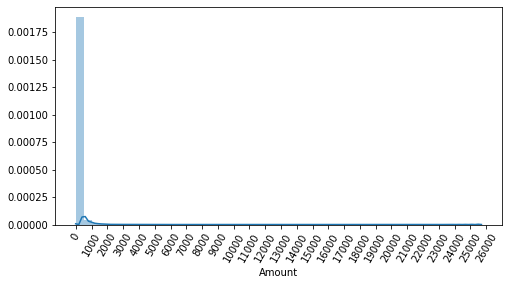

In [22]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount']) # Amount 분포를 확인 결과 대부분이 1,000불 이하인 데이터가 대부분으로 매우 불균형

In [23]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [24]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test) # 성능의 별다른 개선은 없음

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.8040
### LightGBM 예측 성능 ###
오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.8783


In [25]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount']) # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환(로그를 이용한 정규화)
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [26]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test) # 로그로 정규화 시 조금 개선됨

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.8006
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.8817


#### 이상치 데이터 제거 후 모델 학습/예측/평가
- 이상치를 찾는 방법에는 여러 가지가 있지만, 이 중 IQR 방식을 적용
- IQR 방식은 IQR(Q3 - Q1)에 1.5를 곱한 것으로 (Q1 - IQR) ~ (Q3 + IQR)의 범위 밖의 값을 이상치로 취급(보통 1.5로 설정함)
- 어떤 피처에 대해 이상치를 탐지할지 결정해야 하는데, 보통 타겟 변수와 상관성이 높은 변수를 위주로 함

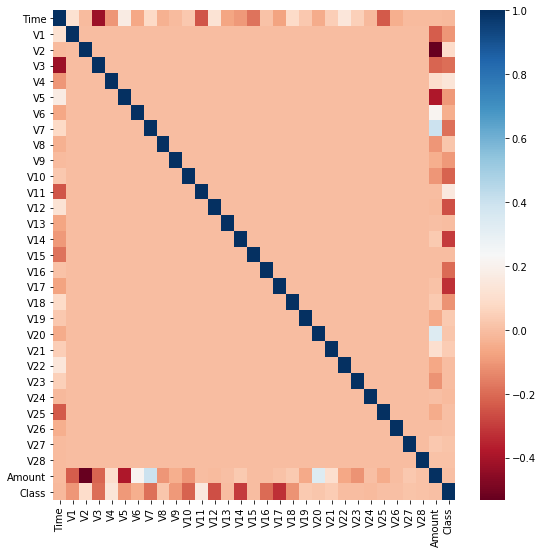

In [27]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu') # RdBu로 설정하면 양의 상관관계가 높을수록 색이 진한 파란색에 가깝고, 음의 경우 빨간색에 가깝게 표현됨
# 여기서는 V14와 V17이 있는데 이 중 V14에 대해서만 이상치를 제거해보자

In [28]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [29]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [30]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True) # 이상치를 가지는 행 드랍
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test) # 이상치 제거 후 성능 크게 향상

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.8355
### LightGBM 예측 성능 ###
오차 행렬
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9144


#### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

Using TensorFlow backend.


SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
dtype: int64


In [32]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)
# 정밀도가 지나치게 낮은데, 이는 오버 샘플링으로 인해 원본 데이터보다 너무나 많은 Class=1 데이터를 학습한 결과

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9485


In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

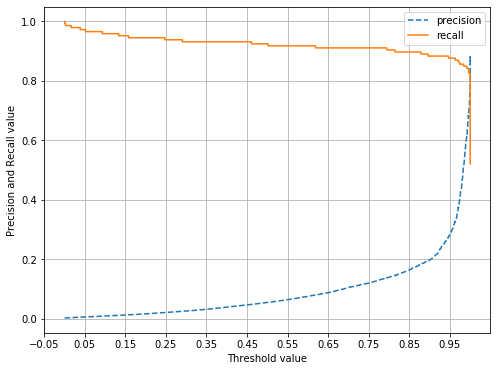

In [34]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1])

In [35]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)
# 재현율은 올라갔으나, 정밀도는 떨어짐(좋은 SMOTE 모델일수록 재현율의 증가율은 높이고, 정밀도의 감소율을 낮춤)

오차 행렬
[[85286     9]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.8493,    F1: 0.8889, AUC:0.9246
